# Assignment 3 - Supervised Learning

## *Danny Witt*
Netid:  *drw48*

Gitlab: https://gitlab.oit.duke.edu/ids705-sp19/danielwitt/blob/master/Assignment_3.ipynb

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

**ANSWER**

**1a. What is the likelihood function of the data we wish to maximize?**

With our logistic regression model, our goal is to define a *log-likelihood function* and derive weights ($\mathbf{w}^T)$ that maximize this function. 

Define the probability distribution for a single point, given a Bernoulli probability mass function:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)=\sigma(\mathbf{w}^T\mathbf{x})^y\cdot [1-\sigma(\mathbf{w}^T\mathbf{x})]^{(1-y)}$$

Defining Likelihood Function:

$$L(\mathbf{w})=\prod_{i=1}^{n}P(Y=y_i|X=x_i)=\prod_{i=1}^{n}\sigma(\mathbf{w}^T\mathbf{x}_i)^{y_i}\cdot[1-\sigma(\mathbf{w}^T\mathbf{x}_i)]^{1-y_i}$$

Defining Log Likelihood Function:

$$LL(\mathbf{w})=\sum_{i=1}^{n}y_ilog\sigma(\mathbf{w}^T\mathbf{x}_i)+(1-y_i)log[1-\sigma(\mathbf{w}^T\mathbf{x}_i)]$$


**1b. Express part (a) as cost function of model parameters.**

$$C(\mathbf{w})=-\frac{1}{n}(\sum_{i=1}^{n}y_ilog(\sigma(\mathbf{w}^T\mathbf{x}_ij))+(1-y_i)log[1-\sigma(\mathbf{w}^T\mathbf{x}_ij)])$$

**1c. Calculate the gradient of the cost function with respect to the model parameters. Express as partial derivatives of cost function with respect to parameters.**

$$\text{Let}\space h_w(x_ij) = \sigma(\mathbf{w}^T\mathbf{x}_{ij})$$

$$\frac{\partial C(\mathbf{w})}{\partial \mathbf{w_j}} = \frac{\partial}{\partial \mathbf{w_j}} \frac{-1}{n}\sum_{i=1}^{n}[y_ilog(h_w(\mathbf{x}_{ij}))+(1-y_i)log(1-h_w(\mathbf{x_{ij}}))]$$

$$=\frac{-1}{n}\sum_{i=1}^{n}[y_i\frac{\partial}{\partial \mathbf{w_j}}log(h_w(\mathbf{x}_{ij}))+(1-y_i)\frac{\partial}{\partial \mathbf{w_j}}log(1-h_w(\mathbf{x_{ij}}))]$$ 

$$=\frac{-1}{n}\sum_{i=1}^{n}[y_i x_{ij} - x_{ij}(h_w(x_ij))]$$

$$= \frac{-1}{n}\sum_{i=1}^{n}[y_i-\sigma(\mathbf{w}^T\mathbf{x_i})]x_{ij}$$

$$j \in [0,1,2]$$

**1d. Gradient descent update equation**

$$\mathbf{w}_j^{update} = \mathbf{w}_j^{prior} - \eta \cdot \nabla_{\mathbf{w}}C(\mathbf{w})$$

#### Prepare and plot your data

**(e) Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?**

**ANSWER**

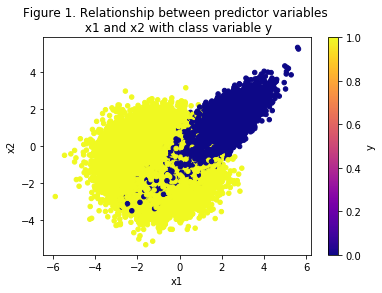

In [2]:
#Part 1e: Load the data and comment

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.chdir("/Users/dannywitt/Desktop/MIDS/IDS_705_ML/ids705/assignments/data/")

#Input data:
data_q1 = pd.read_csv('A3_Q1_data.csv')

#Look at data:
#data_q1.head()
#data_q1.shape

fig, ax = plt.subplots()
data_q1.plot.scatter( x='x1', y='x2', c='y', colormap='plasma', title = 'Figure 1. Relationship between predictor variables \n x1 and x2 with class variable y', ax=ax)


**Answer 1e [continued]:**

The data in Part 1e are not ideally separated by logistic regression, as they do no exhibit a clear linear decision boundary between two target variables. However, there is a possiblity that a logistic regression model could have increased accuracy of classification by using non-linear features with linear parameters (w) which are separable in higher dimensional spaces.



[Text(0,0.5,'Frequency'),
 Text(0.5,0,'x1 value'),
 Text(0.5,1,'Figure 2. Histogram of Predictor Variable x1')]

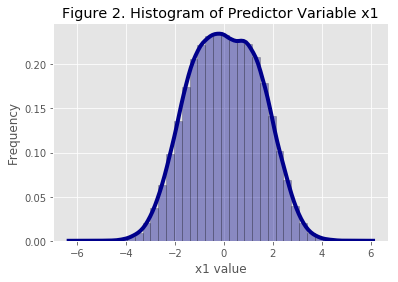

In [3]:
#Part 1f: Missing data, scale differences in data?

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.style.use('ggplot')

#Histograms of variable x1

ax = sns.distplot(data_q1['x1'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='x1 value', ylabel='Frequency', title='Figure 2. Histogram of Predictor Variable x1')

[Text(0,0.5,'Frequency'),
 Text(0.5,0,'x2 value'),
 Text(0.5,1,'Figure 3. Histogram of Predictor Variable x2')]

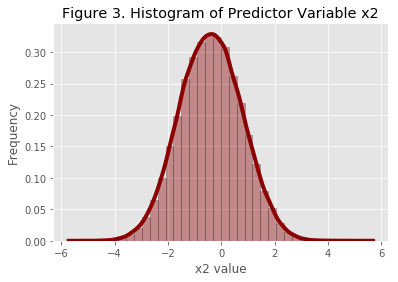

In [4]:
#Histogram of variable x2:

ax = sns.distplot(data_q1['x2'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='x2 value', ylabel='Frequency', title='Figure 3. Histogram of Predictor Variable x2')

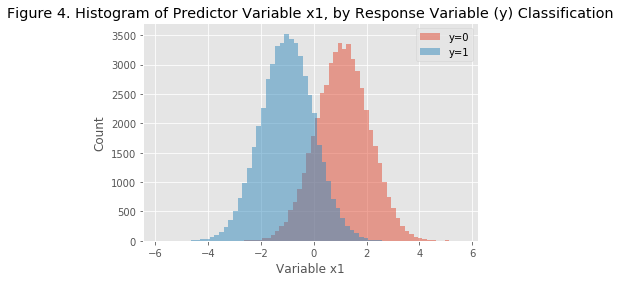

In [11]:
from matplotlib.pyplot import *
import pandas as pd

#Histogram of variable x1 by class

fig, ax = subplots()
data_q1.groupby('y').x1.hist(bins = 50, alpha=0.5, ax=ax)
plt.title('Figure 4. Histograms of Predictor Variable x1, by Response Variable (y) Classification')
plt.xlabel('Variable x1')
plt.ylabel('Count')
ax.legend(['y=0', 'y=1'])

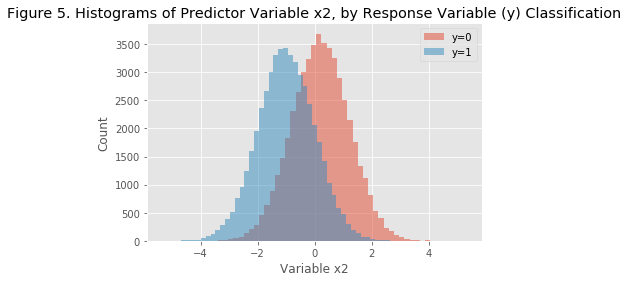

In [13]:
#Histogram of variable x2 by class
fig, ax = subplots()
data_q1.groupby('y').x2.hist(bins = 50, alpha=0.5, ax=ax)
plt.title('Figure 5. Histograms of Predictor Variable x2, by Response Variable (y) Classification')
plt.xlabel('Variable x2')
plt.ylabel('Count')
ax.legend(['y=0', 'y=1'])

Number of y=0 and y=1 variables:
1.0    50000
0.0    50000
Name: y, dtype: int64


Text(0.5,1,'Figure 6. Distribution of binary classes in target variable "y"')

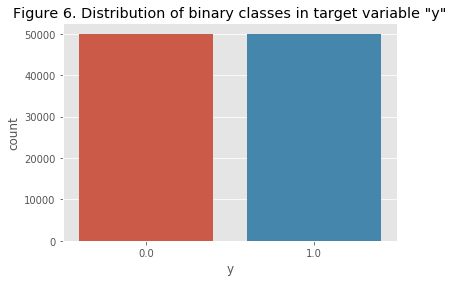

In [189]:
#Frequency of variable y
print('Number of y=0 and y=1 variables:')
print(data_q1['y'].value_counts())

plot_y = sns.countplot(x='y',data=data_q1)

plot_y.set_title('Figure 6. Distribution of binary classes in target variable "y"')

#data_q1['y'].value_counts().plot(kind='bar')

Count of Missing Data in x1, x2, and y variables:
x1    0
x2    0
y     0
dtype: int64

There are no missing values in any variables.


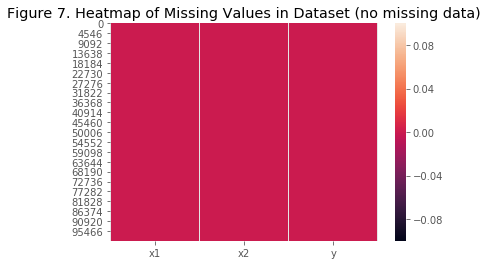

In [20]:
#Missing Data?
print('Count of Missing Data in x1, x2, and y variables:')
print(data_q1.isnull().sum())
print('')

#Check with null heatmap: 

missing = sns.heatmap(data_q1.isnull())
missing.set(title = 'Figure 7. Heatmap of Missing Values in Dataset (no missing data)')

print('There are no missing values in any variables.')

**(f) Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?**

**Answer 1f:**

The predictor variables x1 and x2 are both similarly distributed with respect to target variables y=0 and y=1. Also, there is an equal number of target variable in each of the possible binary classes (y=0, y=1). The features x1 and x2 have similar magnitude/range (i.e., most values fall between -4 and 4) and similar means/standard deviations. Thus, there is no need to standardize or scale for differences. Also, there is no missing data, so no adjustment techniques are required. 

#### Implement gradient descent and your logistic regression algorithm

**(g) Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.**

**ANSWER**

In [ ]:
#Part 1g: sigmoid function and probability function for applying sigmoid function to the weighted sum of w, x pairs

def sigmoid(x):
    # Activation function used to map any real value between 0 and 1, according to sigmoid function as f(x)
    return 1 / (1 + np.exp(-x))

def probability(x, weights):
    # Returns a 1D array of the probabilities for given weighted sum of w,x inputs after passing through sigmoid function
    return sigmoid(np.dot(x, weights))

**(h) Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.**

**ANSWER**

In [ ]:
#Part 1h: compute a cost function (C(w)) for given dataset (x), weights (w), and with class labels (y)
    
def log_loss_cost_function(x, weights, y):
    # Computes the cost function for all the training samples
    n = x.shape[0]
    total_cost = -(1 / n) * np.sum( y * np.log(probability(x, weights)) + (1 - y) * np.log( 1 - probability(x, weights)))
    return total_cost

**(i) Create a function or class to run gradient descent on your training data.**

**We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. **

**Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. **

**In doing this we'll need to make some assumptions / experiment with the following:**

**1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.**

**2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.**

**3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.**



In [21]:
#Divide Data into Training and Testing Set:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_q1.drop('y',axis=1), 
                                                    data_q1['y'], test_size=0.30, 
                                                    random_state=101)


In [22]:
class Logistic_Regression():
    ''' Logistic Regression model class designed to intake X and Y training data, fit a logistic model to that data 
    with a sigmoid activation function, calculate log loss cost associated with a given model fit, and train our model
    by iterating through model fits by changing weight parameters associated with given variables in the X training data
    and assessing the relative change in cost via gradient descent method. After training, class can also intake 
    X test data and predictions of Y value classifications can be made using that data and the fitted model from training
    '''
    def __init__(self, x, y, intercept = 'False'):
        self.y = y
        self.add_inter = intercept
        if self.add_inter == 'True':
            self.x = self.add_intercept(x)
        elif self.add_inter == 'False':
            self.x = x
        self.weights = np.random.rand(self.x.shape[1])
        return
    
    def add_intercept(self, x):
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)
    
    def sigmoid(self, x):
        # Activation function used to map any real value between 0 and 1, according to sigmoid function
        return 1 / (1 + np.exp(-x))

    def probability(self, x, weights):
        # Returns a 1D array of the probabilities for given weighted sum of w,x inputs after passing through sigmoid
        x_w_proj = np.dot(x, weights)
        probabilities = self.sigmoid(x_w_proj)
        return probabilities
    
    def target_pred_error(self, x, weights, y):
        target_pred_error = y - self.probability(x, weights)
        return target_pred_error

    def log_loss_cost_function(self, x, weights, y):
        # Computes the cost function for all the training samples
        n = x.shape[0]
        total_cost = -(1 / n) * np.sum( y * np.log(self.probability(x, weights)) + (1 - y) * np.log( 1 - self.probability(x, weights)))
        return total_cost

    def gradient(self, x, weights, y):
        gradient = np.dot(x.T, self.target_pred_error(x, weights, y))
        return gradient

    def train(self, iterations, learn_rate):
        
        self.cost_history = []

        for iteration in range(iterations):
            # Update weights with gradient
            
            gradient = self.gradient(self.x, self.weights, self.y)
            
            #Calculate cost and create a cost_history to graph change in cost with respect to iteration/epoch
            cost = self.log_loss_cost_function(self.x, self.weights, self.y)
            self.cost_history.append(cost)
            
            #Add product of learning rate x gradient to the previous set of estimated weights
            weights_updated = self.weights + (learn_rate * gradient)
            
            #Stopping criteria based on L2 norm (i.e., Euclidean norm); or, if criteria not met, then set 
            #updated weights to current object weights:
            if np.dot(weights_updated, self.weights) < 10**(-6):
                print('Stopping criteria has been met. Stopping iterations now.')
                break
            else:
                self.weights = weights_updated
            
            #Assign object attributes of intercepts and each variable's weight
            if self.add_inter == 'True':
                self.intercept = self.weights[0]
                self.weight_x1 = self.weights[1]
                self.weight_x2 = self.weights[2]
            else:
                self.weight_x1 = self.weights[0]
                self.weight_x2 = self.weights[1]
                
            # Print iteration progress, most recent weights vector, and 
            # average log-likelihood cost at given iteration:
            if iteration % 1000 == 0:
                print('Iteration: ' + str(iteration) + '  ||  ' 
                      + 'Current weight vec: {}'.format(self.weights) + '  ||  ' 
                      + 'Average Cost: '+ str(cost))
        
        return
   
    def decision_boundary(self, probability):
        threshold = 0.5
        return 1 if probability >= threshold else 0

    def classification(self, x):
        '''input  - N element array of predictions between 0 and 1 
        output - N element array of 0s (False) and 1s (True)
        '''
        probabilities = self.probability(x, self.weights)
        decision = np.vectorize(self.decision_boundary)
        return decision(probabilities).flatten()
    
    def predict(self, X_test):
        if self.add_inter == 'True' and self.weights.shape[0] == 3:
            self.weights = self.weights[1:]
        else:
            pass
        predicted_classifications = self.classification(X_test)
        return predicted_classifications

In [23]:
#Train multiple models with different learning rates (lr= 1e-6 to 1e-9):

#logreg_lr_1e3 = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
#logreg_lr_1e3.train(iterations = 3000, learn_rate = 1e-3)

#logreg_lr_1e4 = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
#logreg_lr_1e4.train(iterations = 3000, learn_rate = 1e-4)

#logreg_lr_1e5 = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
#logreg_lr_1e5.train(iterations = 3000, learn_rate = 1e-5)

#LR = 1e-6, training on test and train:
logreg_lr_1e6_train = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
logreg_lr_1e6_train.train(iterations = 3000, learn_rate = 1e-6)

logreg_lr_1e6_test = Logistic_Regression(x = X_test, y = y_test, intercept = 'False')
logreg_lr_1e6_test.train(iterations = 3000, learn_rate = 1e-6)

#LR = 1e-7, training on test and train:
logreg_lr_1e7_train = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
logreg_lr_1e7_train.train(iterations = 3000, learn_rate = 1e-7)

logreg_lr_1e7_test = Logistic_Regression(x = X_test, y = y_test, intercept = 'False')
logreg_lr_1e7_test.train(iterations = 3000, learn_rate = 1e-7)

#LR = 5e-8, training on test and train:
logreg_lr_5e8_train = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
logreg_lr_5e8_train.train(iterations = 3000, learn_rate = 5e-8)

logreg_lr_5e8_test = Logistic_Regression(x = X_test, y = y_test, intercept = 'False')
logreg_lr_5e8_test.train(iterations = 3000, learn_rate = 5e-8)

#LR = 1e-8, training on test and train:
logreg_lr_1e8_train = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
logreg_lr_1e8_train.train(iterations = 3000, learn_rate = 1e-8)

logreg_lr_1e8_test = Logistic_Regression(x = X_test, y = y_test, intercept = 'False')
logreg_lr_1e8_test.train(iterations = 3000, learn_rate = 1e-8)

#LR = 1e-9, training on test and train:
logreg_lr_1e9_train = Logistic_Regression(x = X_train, y = y_train, intercept = 'False')
logreg_lr_1e9_train.train(iterations = 3000, learn_rate = 1e-9)

logreg_lr_1e9_test = Logistic_Regression(x = X_test, y = y_test, intercept = 'False')
logreg_lr_1e9_test.train(iterations = 3000, learn_rate = 1e-9)

Iteration: 0  ||  Current weight vec: [0.53961956 0.46125484]  ||  Average Cost: 1.352720667250419
Iteration: 1000  ||  Current weight vec: [-1.95314477 -0.32157784]  ||  Average Cost: 0.3274883227629089
Iteration: 2000  ||  Current weight vec: [-1.97075298 -0.31699454]  ||  Average Cost: 0.3274787899681258
Iteration: 0  ||  Current weight vec: [0.57994599 0.94230085]  ||  Average Cost: 1.6337711766146155
Iteration: 1000  ||  Current weight vec: [-1.80751071 -0.34577485]  ||  Average Cost: 0.3315183178114847
Iteration: 2000  ||  Current weight vec: [-1.92896093 -0.31586875]  ||  Average Cost: 0.33086404243701517
Iteration: 0  ||  Current weight vec: [0.20439692 0.3468567 ]  ||  Average Cost: 0.9604838873342207
Iteration: 1000  ||  Current weight vec: [-1.19871115 -0.38248059]  ||  Average Cost: 0.3502177920029876
Iteration: 2000  ||  Current weight vec: [-1.52403696 -0.40577871]  ||  Average Cost: 0.33406692275803895
Iteration: 0  ||  Current weight vec: [0.53411799 0.05343104]  ||  Av

**(j) At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data.**

**(k) Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.**

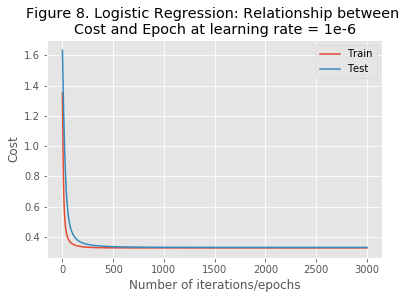

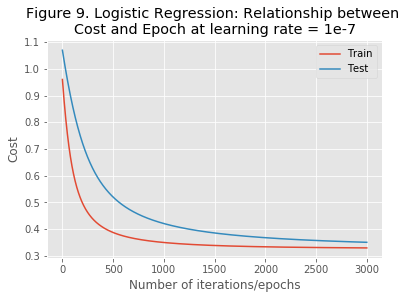

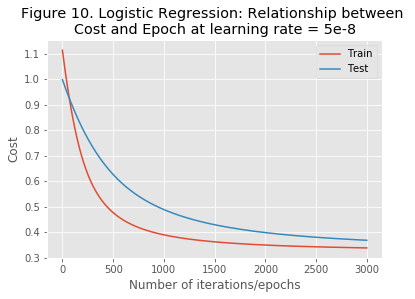

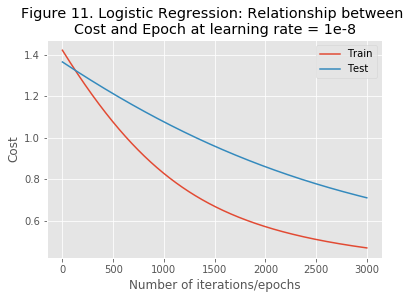

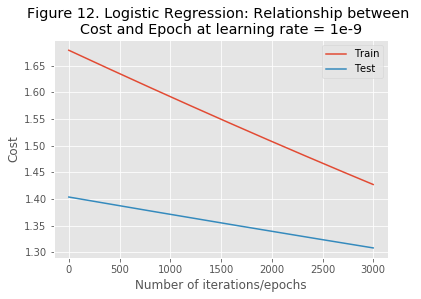

In [26]:
#Part 1k: plot relationship between cost and iteration (or, epoch) at different tested learning rates

#LR= 1e-6:

plt.figure()
plt.plot(np.arange(len(logreg_lr_1e6_train.cost_history)), logreg_lr_1e6_train.cost_history)
plt.plot(np.arange(len(logreg_lr_1e6_test.cost_history)), logreg_lr_1e6_test.cost_history)
plt.xlabel("Number of iterations/epochs")
plt.ylabel("Cost")
plt.title("Figure 8. Logistic Regression: Relationship between \nCost and Epoch at learning rate = 1e-6")
plt.legend(['Train','Test'])
plt.show()

#LR= 1e-7:
plt.figure()
plt.plot(np.arange(len(logreg_lr_1e7_train.cost_history)), logreg_lr_1e7_train.cost_history)
plt.plot(np.arange(len(logreg_lr_1e7_test.cost_history)), logreg_lr_1e7_test.cost_history)
plt.xlabel("Number of iterations/epochs")
plt.ylabel("Cost")
plt.title("Figure 9. Logistic Regression: Relationship between \nCost and Epoch at learning rate = 1e-7")
plt.legend(['Train','Test'])
plt.show()

#LR= 5e-8:
plt.figure()
plt.plot(np.arange(len(logreg_lr_5e8_train.cost_history)), logreg_lr_5e8_train.cost_history)
plt.plot(np.arange(len(logreg_lr_5e8_test.cost_history)), logreg_lr_5e8_test.cost_history)
plt.xlabel("Number of iterations/epochs")
plt.ylabel("Cost")
plt.title("Figure 10. Logistic Regression: Relationship between \nCost and Epoch at learning rate = 5e-8")
plt.legend(['Train','Test'])
plt.show()

#LR= 1e-8:
plt.figure()
plt.plot(np.arange(len(logreg_lr_1e8_train.cost_history)), logreg_lr_1e8_train.cost_history)
plt.plot(np.arange(len(logreg_lr_1e8_test.cost_history)), logreg_lr_1e8_test.cost_history)
plt.xlabel("Number of iterations/epochs")
plt.ylabel("Cost")
plt.title("Figure 11. Logistic Regression: Relationship between \nCost and Epoch at learning rate = 1e-8")
plt.legend(['Train','Test'])
plt.show()

#LR= le-9:
plt.figure()
plt.plot(np.arange(len(logreg_lr_1e9_train.cost_history)), logreg_lr_1e9_train.cost_history)
plt.plot(np.arange(len(logreg_lr_1e9_test.cost_history)), logreg_lr_1e9_test.cost_history)
plt.xlabel("Number of iterations/epochs")
plt.ylabel("Cost")
plt.title("Figure 12. Logistic Regression: Relationship between \nCost and Epoch at learning rate = 1e-9")
plt.legend(['Train','Test'])
plt.show()

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

In [30]:
#Get entire data set as predictors and response variables--to input into K-fold CV:

y_all = data_q1['y']

x_all = data_q1[['x1','x2']]

Iteration: 0  ||  Current weight vec: [0.03300481 0.38578135 0.97062676]  ||  Average Cost: 1.4451570388626198
Iteration: 1000  ||  Current weight vec: [ 0.07402573 -0.20674171  0.52390739]  ||  Average Cost: 0.7723405936556188
Iteration: 2000  ||  Current weight vec: [ 0.09158568 -0.55678577  0.25108541]  ||  Average Cost: 0.5291431308972938
Iteration: 0  ||  Current weight vec: [0.5772092  0.03237007 0.87695182]  ||  Average Cost: 1.1040437661685838
Iteration: 1000  ||  Current weight vec: [ 0.52648479 -0.45202167  0.52096428]  ||  Average Cost: 0.6580345543632056
Iteration: 2000  ||  Current weight vec: [ 0.4721241  -0.74004007  0.31145557]  ||  Average Cost: 0.49884234175065023
Iteration: 0  ||  Current weight vec: [0.57334438 0.09682004 0.06455453]  ||  Average Cost: 0.8059737815296298
Iteration: 1000  ||  Current weight vec: [ 0.4678449  -0.29360638 -0.11171434]  ||  Average Cost: 0.5670503566871029
Iteration: 2000  ||  Current weight vec: [ 0.38197069 -0.54186436 -0.20432449]  |

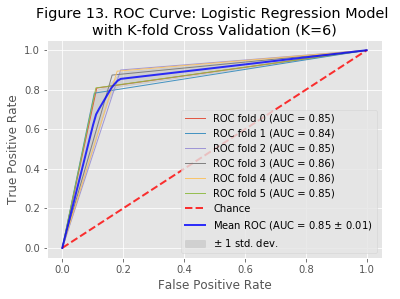

In [31]:
#Part 1"l": Test performance of trained classifier using K-folds cross validation

#Test performance of trained classifier using K-folds cross validation; produce ROC curves of validated performance
from numpy import array
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

# Data IO and generation:
x = x_all
y = y_all

n_samples, n_features = x.shape

###############################################################################

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(x, y):
    #instantiate model with given k-fold cross-validation training data sets
    final_lr_model = Logistic_Regression(x.iloc[train], y.iloc[train], intercept= 'True')
    #train model on training data
    final_lr_model.train(iterations = 3000, learn_rate = 1e-8)
    probas = final_lr_model.predict(x.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.9,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 13. ROC Curve: Logistic Regression Model \nwith K-fold Cross Validation (K=6)')
plt.legend(loc="lower right")
plt.show()


**(o- out of order for comparison in Figure 13) Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?**

The model achieves a mean AUC = 0.85 +/- 0.01 SD. The model achieves more optimal combined true positive and false positive rate trade-offs than random chance guessing (illustrated in Figure 13 by red dashed diagonal line). 

**(m) Why do we use cross validation?**

Cross validation is the methodological step where the entire data are divided into multiple sets, rather than a single split into training and test sets. The primary value of this method is that it reduces the chance that a model is overfit to an "unrepresentative" sample of training data and subsequently performs at low accuracy on a new test set. Instead, this method requires that all training data is included in a model at least once (in a given fold, not counting test fold) and thus requires that the developed model generalizes to all of the samples in the dataset for all of the cross-validation scores and the mean to be high.

Another benefit of cross-validation is that a larger portion of the total data is used in training the model, which can increase the generalizability of the model on test data. Finally, a third value of cross-validation approach is that we can see the range of performances of our model in the "real world" on test data, as we are able to see multiple folds tested on the test data. Thus, if there is a large difference in how the models fit to multiple folds perform, there is evidence that the model may have high variance and change performance with new or changed data. 

**(n) Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?**

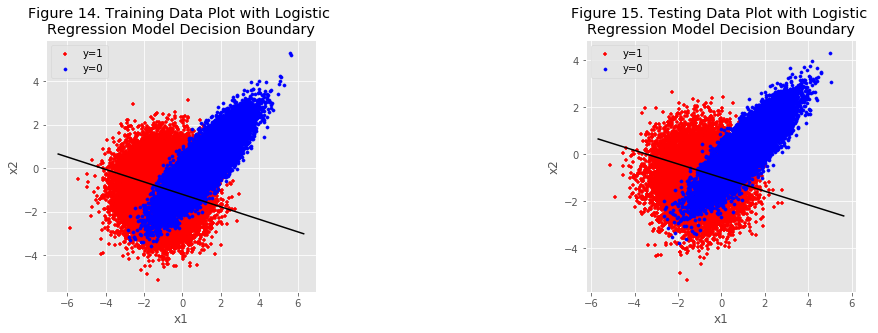

In [214]:
#Generate plots of train and test data and plot decision boundary line overlaying both scatter plots:

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(X_train.x1[y_train == 1],X_train.x2[y_train == 1], s=10, c='r', marker="+", label='y=1')
ax1.scatter(X_train.x1[y_train == 0],X_train.x2[y_train == 0], s=10, c='b', marker="o", label='y=0')
plt.legend(loc='upper left');

x_min, x_max = ax1.get_xlim()
ax1.plot([x_min, x_max], 
         [final_lr_model.intercept, 
          x_max*final_lr_model.weight_x1+x_max*final_lr_model.weight_x2+final_lr_model.intercept], c='black')
plt.title('Figure 14. Training Data Plot with Logistic \nRegression Model Decision Boundary')
plt.ylabel('x2')
plt.xlabel('x1')

ax2 = fig.add_subplot(122)
ax2.scatter(X_test.x1[y_test == 1],X_test.x2[y_test == 1], s=10, c='r', marker="+", label='y=1')
ax2.scatter(X_test.x1[y_test == 0],X_test.x2[y_test == 0], s=10, c='b', marker="o", label='y=0')
plt.legend(loc='upper left')

x_min, x_max = ax2.get_xlim()
ax2.plot([x_min, x_max], 
         [final_lr_model.intercept, 
          x_max*final_lr_model.weight_x1+x_max*final_lr_model.weight_x2+final_lr_model.intercept], c='black')
plt.title('Figure 15. Testing Data Plot with Logistic \nRegression Model Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplots_adjust(left=None, bottom=None, right=2.0, top=1.0, wspace=1.0, hspace=None)

plt.show()

**Answer 1n (continued)**

The decision boundary could potentially be improved within the logistic regression model by using a higher K-fold value within K-fold cross-validation. It is unclear whether transformations to the data variables would yield a higher accuracy decision boundary within the logistic regression model framework. Other classification algorithms could likely outperform this model given the clear non-linear theoretical Bayesian decision boundary. Specifically, k-NN could likely have better classification performance.

## 2

### [20 points] Digits classification

**(a) Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.**

**Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format.**

**(b) Plot 10 examples of each class 0 and 1, from the training dataset.**

**ANSWER (2a,b)**

In [17]:
#Parts 2a, b
import os
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

#Downloaded data to .csv file, set working directory to file location:

os.chdir("/Users/dannywitt/Desktop/MIDS/IDS_705_ML/ids705/assignments/data/")

#Input data:
image_train_original = pd.read_csv('mnist_train.csv', header = None)
image_test_original = pd.read_csv('mnist_test.csv', header = None)

#Generate entire data set x and y arrays, for use in CV model
all_images = pd.concat([image_train_original, image_test_original])

all_images_binary = all_images.copy()

all_images_binary.iloc[:,0] = np.where(all_images.iloc[:,0]==3, 1, 0)

all_images_x = np.array(all_images_binary.iloc[:,1:])

all_images_y = np.array(all_images_binary.iloc[:,0])

#Make copies of dfs:

image_train = image_train_original.copy()
image_test = image_test_original.copy()

#Create new binary target variable in both training and test sets; if digit is 3 y=1, else y=0.

image_train.iloc[:,0] = np.where(image_train.iloc[:,0]== 3, 1, 0)

image_test.iloc[:,0] = np.where(image_test.iloc[:,0]==3, 1, 0)

In [18]:
#Assign training and testing arrays:
digits_train = np.array(image_train.iloc[:,1:])
target_train = np.array(image_train.iloc[:,0])
digits_test = np.array(image_test.iloc[:,1:])
target_test = np.array(image_test.iloc[:,0])

Figure 16. 10 images of class y=1 (number 3)


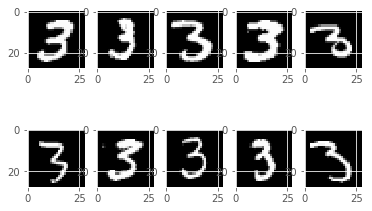

In [50]:
#Show 10 images of y = 1 (i.e., the number "3") in training set:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print('Figure 16. 10 images of class y=1 (number 3)')
plt.figure()
dig_count = 0
for i in range(digits_train.shape[0]):
    if dig_count < 10:
        if target_train[i,] == 1:
            # plot with various axes scales
            plt.subplot(2, 5, (dig_count+1))
            image = digits_train[i,:]
            image = np.array(image, dtype='float')
            pixels = image.reshape((28, 28))
            plt.imshow(pixels, cmap='gray')
            plt.grid(True)
            dig_count += 1
        else:
            pass
        pass
    else:
        plt.show()


Figure 17. 10 images of class y=0 (numbers 0-9, excluding 3)


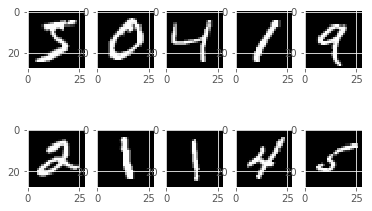

In [51]:
#Show 10 images of y = 0 (i.e., any number that is NOT the number "3") in training set:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print('Figure 17. 10 images of class y=0 (numbers 0-9, excluding 3)')
plt.figure()
dig_count = 0
for i in range(digits_train.shape[0]):
    if dig_count < 10:
        if target_train[i,] == 0:
            # plot with various axes scales
            plt.subplot(2,5,(dig_count+1))
            image = digits_train[i,:]
            image = np.array(image, dtype='float')
            pixels = image.reshape((28, 28))
            plt.imshow(pixels, cmap='gray')
            plt.grid(True)
            dig_count += 1
        else:
            pass
        pass
    else:
        plt.show()

**(c) How many examples are present in each class? Are the classes balanced? What issues might this cause?**

**Answer 2c**

There are n=53869 examples of (y=0) non-3 digits and n=6131 examples of (y=1) 3-digits. Thus, the classes are not balanced as the y=0 class is much larger than the y=1 class. This can pose the issue of having a model fit proportionately to the larger class sample, and thus training the classification model to increase relative weights for variables that identify the larger-share class. For example, if the data classes were 5% and 95%, the classifer could guess the larger class every time and still have a 95% accuracy, however when applied to novel test data, the model could underperform. 

Number of y=0 and y=1 variables:
0    53869
1     6131
Name: 0, dtype: int64


Text(0,0.5,'Count')

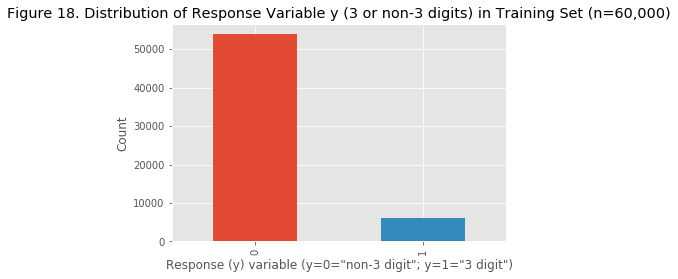

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Frequency of target variables across all training data:

print('Number of y=0 and y=1 variables:')
counts = image_train.iloc[:,0].value_counts()
print(counts)
counts.plot(kind='bar')
plt.title('Figure 18. Distribution of Response Variable y (3 or non-3 digits) in Training Set (n=60,000)')
plt.xlabel('Response (y) variable (y=0="non-3 digit"; y=1="3 digit")')
plt.ylabel('Count')

**(d) Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.**

**Answer (2d) Using cross-validation, train and test a classifier.**

**Compare your performance against: (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's.**

**Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.**

Fold 0 completed.
Fold 1 completed.
Fold 2 completed.
Fold 3 completed.
Fold 4 completed.
Fold 5 completed.


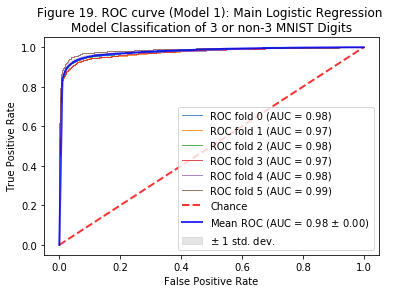

In [20]:
#Part 2d: Generate report of performance for main classifier (logistic regression), Model 1

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = LogisticRegression(max_iter=4000)

X = all_images_x
y = all_images_y

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    #Train model and predict on given fold's x training data:
    probas_m1 = classifier.fit(X[train], y[train]).predict_proba(X[test])
    
    # Compute ROC curve and area the curve:
    fpr, tpr, thresholds = roc_curve(y[test], probas_m1[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.8,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #Progress update:
    print('Fold {} completed.'.format(i))
    
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 19. ROC curve (Model 1): Main Logistic Regression \nModel Classification of 3 or non-3 MNIST Digits')
plt.legend(loc="lower right")
plt.show()

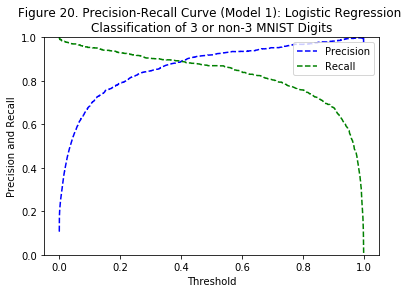

In [22]:
#Part 2d (continued): Model 1 Precision-recall curve for main logistic regression model

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall Curve:
# Keep only probabilities of positive outcome:

precisions, recalls, thresholds = precision_recall_curve(y[test], probas_m1[:,1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Precision and Recall")
    plt.legend(loc="upper right")
    plt.ylim([0,1])
    plt.title("Figure 20. Precision-Recall Curve (Model 1): Logistic Regression \nClassification of 3 or non-3 MNIST Digits")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Fold 0 completed.
Fold 1 completed.
Fold 2 completed.


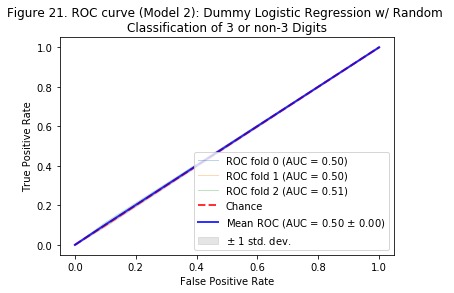

In [31]:
#Part 2d (continued): Model 2--Generate next model using DummyClassifier for completely random-assignment classification rule
#Also, should be mean ROC-AUC same as our "Chance" plotted line in above ROC

from sklearn.dummy import DummyClassifier
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=3)

#Instantiate dummy classifier (random classification):
dummyRandom_classifier = DummyClassifier(strategy='stratified', random_state=0)

#Assign training and test data to new simple variables
X = digits_train
y = target_train

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_m2 = dummyRandom_classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_m2[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #Progress update:
    print('Fold {} completed.'.format(i))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 21. ROC curve (Model 2): Dummy Logistic Regression w/ Random \nClassification of 3 or non-3 Digits')
plt.legend(loc="lower right")

plt.show()

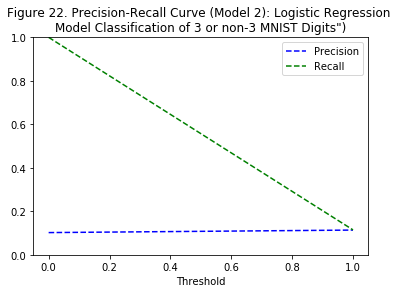

In [34]:
#Part 2d, Model 2 Precision-Recall Plot
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall Curve:
# Keep only probabilities of positive outcome:

precisions, recalls, thresholds = precision_recall_curve(y[test], probas_m2[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.title('Figure 22. Precision-Recall Curve (Model 2): Logistic Regression \nModel Classification of 3 or non-3 MNIST Digits")')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Fold 0 completed.
Fold 1 completed.
Fold 2 completed.


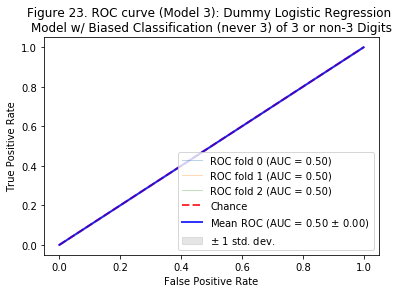

In [35]:
#Part 2d (continued): Generate next model using a different DummyClassifier for all Non-3 (y=0) classification rule

from sklearn.dummy import DummyClassifier
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=3)

#Generate classification model:
dummyNo3s_classifier = DummyClassifier(strategy='constant', random_state=0, constant = 0)

#Assign training and target data to simple variables
X = digits_train
y = target_train

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_m3 = dummyNo3s_classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_m3[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    print('Fold '+ str(i) + ' completed.')

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 23. ROC curve (Model 3): Dummy Logistic Regression \nModel w/ Biased Classification (never 3) of 3 or non-3 Digits')
plt.legend(loc="lower right")
plt.show()

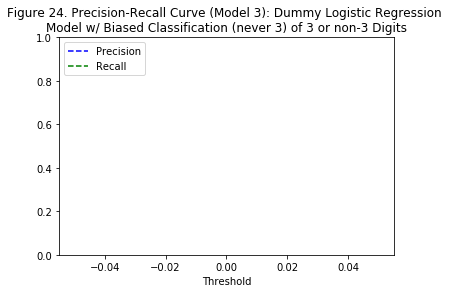

In [44]:
#Part 2d (continued)--Precision-Recall Plot Model #3:

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall Curve:
# Keep only probabilities of positive outcome:

precisions, recalls, thresholds = precision_recall_curve(y[test], probas_m3[:,1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title('Figure 24. Precision-Recall Curve (Model 3): Dummy Logistic Regression \nModel w/ Biased Classification (never 3) of 3 or non-3 Digits')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

**Final part of Q2d: Describe the algorithm's performance and explain any discrepancies you find.**


**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

In [21]:
#Part 2f: Lasso Regularization of Logistic Regression Model

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

class lasso_regression:
    def __init__(self, alpha, X_train, y_train, X_test, y_test):
        self.alpha = alpha
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        return
    
    def log_reg_predict(self):
        #Use the logistic regression to predict class labels (since Lasso() method only gives weight coefficients) and
        #set penalty to "l1"
        self.log_reg = LogisticRegression(penalty='l1', fit_intercept=False)
        y_pred_class = self.log_reg.fit(self.X_train, self.y_train).predict(self.X_test)
        return y_pred_class
        
    def fit_Lasso(self):
        #Fit the model using the Lasso() function
        self.fitted_Lasso = Lasso(alpha = self.alpha, max_iter=3e3)
        self.fitted_Lasso.fit(self.X_train, self.y_train)
        y_pred_probs = self.fitted_Lasso.predict(self.X_test)
        return y_pred_probs
    
    def weights(self):
        #Return the results as measuring rss and weight coefficients:
        rss = sum((self.fit_Lasso()-self.y_test)**2)
        ret = []
        #ret.extend([self.fitted_Lasso.intercept_])
        ret.extend(self.fitted_Lasso.coef_)
        return ret
    
    def sigmoid(self, x):
        # Activation function used to map any real value between 0 and 1, according to sigmoid function
        return 1 / (1 + np.exp(-x))

    def probability(self, x, weights):
        # Returns a 1D array of the probabilities for given weighted sum of w,x inputs after passing through sigmoid
        x_w_proj = np.dot(x, weights)
        probabilities = self.sigmoid(x_w_proj)
        return probabilities
    
    def log_loss_cost_function(self):
        # Computes the average log loss cost function for all the training samples:
        n = self.X_train.shape[0]
        total_cost = -(1 / n) * np.sum( self.y_train * np.log(self.probability(self.X_train, self.weights())) + (1 - self.y_train) * np.log( 1 - self.probability(self.X_train, self.weights())))
        return total_cost
 

In [49]:
#2f continued: Apply Lasso Regularized Logistic Regression from above using different coefficients of regularization

from sklearn.metrics import roc_curve, roc_auc_score, f1_score

#Assign list of coefficients of regularization (i.e., alpha) to test:
alpha_val = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Initialize lists to collect history of relevant metrics across each alpha:
num_zeros_history = []
cost_history = []
f1_scores_weighted = []
f1_scores_micro = []
auc_scores = []

#Iterate over the 10 alpha values:
for i in alpha_val:
    lasso = lasso_regression(alpha = i, X_train = X[train], y_train = y[train], X_test = X[test], y_test = y[test])
    weights = lasso.weights()
    
    #Count how many weights out of 754 have been reduced to 0 by regularization process
    num_zero = weights.count(0)
    num_zeros_history.append(num_zero)
    
    #Calculate cost and make historical list of cost values for each value of alpha
    cost = lasso.log_loss_cost_function()
    cost_history.append(cost)
    
    #Calculate y predicted probs:
    y_pred = lasso.fit_Lasso()
    
    #Calculate y classifications from log reg with l1 penalty:
    y_pred_classes = lasso.log_reg_predict()
    
    #F1 metric:
    #f1 = f1_score(y[test], y_pred, average='macro')  
    f1_mic = f1_score(y[test], y_pred_classes, average='micro')  
    f1_weighted = f1_score(y[test], y_pred_classes, average='weighted')  
    #f1 = f1_score(y[test], y_pred, average=None)
    f1_scores_micro.append(f1_mic)
    f1_scores_weighted.append(f1_weighted)
    
    #AUC:
    auc_score = roc_auc_score(y[test], y_pred)
    auc_scores.append(auc_score)
    
    #Monitor Progress:
    print('Processing')

print('Iterations Completed.')

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Iterations Completed.


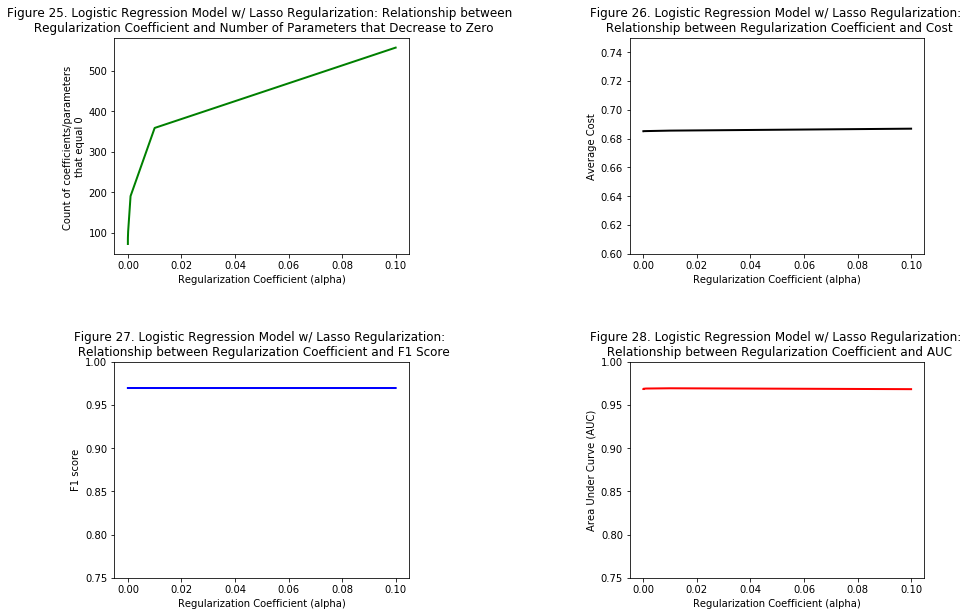

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

#Plot 
plt.figure()
plt.subplot(2,2,1)
plt.plot(alpha_val, num_zeros_history, 'g-', linewidth=2, markersize=2)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('Count of coefficients/parameters \nthat equal 0')
plt.title('Figure 25. Logistic Regression Model w/ Lasso Regularization: Relationship between \n Regularization Coefficient and Number of Parameters that Decrease to Zero')

plt.subplot(2,2,2)
plt.plot(alpha_val, cost_history, 'k-', linewidth=2, markersize=6)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('Average Cost')
plt.title('Figure 26. Logistic Regression Model w/ Lasso Regularization: \n Relationship between Regularization Coefficient and Cost')
plt.ylim([0.6, 0.75])

plt.subplot(2,2,3)
plt.plot(alpha_val, f1_scores_weighted, 'b-', linewidth=2, markersize=6)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('F1 score')
plt.title('Figure 27. Logistic Regression Model w/ Lasso Regularization: \n Relationship between Regularization Coefficient and F1 Score')
plt.ylim([0.75, 1])

plt.subplot(2,2,4)
plt.plot(alpha_val, auc_scores, 'r-', linewidth=2, markersize=6)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('Area Under Curve (AUC)')
plt.title('Figure 28. Logistic Regression Model w/ Lasso Regularization: \n Relationship between Regularization Coefficient and AUC')
plt.ylim([0.75, 1])

plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=0.75, hspace=0.5)

In [51]:
#Check number zeros history:
num_zeros_history

[73, 79, 80, 88, 104, 191, 359, 557]

In [52]:
#Check cost history:
cost_history

[0.6851440140603983,
 0.6851440959855446,
 0.6851451080013117,
 0.6851517058522213,
 0.6851722415879998,
 0.6852152089788787,
 0.6855434916985689,
 0.6868926362457324]

In [53]:
#Check F1 score history:
f1_scores_weighted

[0.9696638188634645,
 0.9696638188634645,
 0.9696638188634645,
 0.9696638188634645,
 0.9696638188634645,
 0.9696706997114238,
 0.9696638188634645,
 0.9696638188634645]

In [54]:
#Check AUC measure history:
auc_scores

[0.9684967943066791,
 0.9685607729646853,
 0.9685635807200217,
 0.9687181980818507,
 0.9687890734592757,
 0.9690614802464325,
 0.9693505154875239,
 0.9683323906908136]

**Answer 2f (continued)**

As noted in the figures 25-28, an increase in the regularization coefficient (alpha) from alpha = 1e-8 to 1e-1 results in an increase in the number of parameters being set to 0 (or, a lower number of non-zero parameters), with relatively no change in cost, F1 score, or area under the curve (AUC). This suggests that the regularization coefficient has relative association with the degree of feature reduction, but does not alter the model's cost or most optimal combined recall, false positive rate, and precision metrics at a given threshold. 

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**Part 3a: Data Overview and Question**

I found a dataset at the Machine Learning archive from (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) which focuses on a healthcare issue (breast cancer prediction) of interest. My interest is in primary care and preventative health. Part of these goals are to be able to provide high sensitivity and high specificity diagnosis of potential cancerous lesions, especially via timely, scalable, automated, and low-cost means. 

The data are collections of various histological (i.e., pertainining to cellular appearance) properties of cell nuclei collected from digitized images of fine needle aspirate (FNA) of a patients with clinically-suspicious breast masses. The data describe various 3-dimensional properties of these nuclei. These metrics are relevant because classically various types of cancers (or neoplasia) involve cellular changes; one hallmark feature of a cancerous change in cells is based on changes observed in the cancerous cells' nuclei, which arise due to changes in regulation of the cell cycle and an increase in pro-mitotic (or pro-dividing) nuclear events. 

The clinical goal is to use the features of a given FNA sample and be able to generate a classification method that achieves high true positive rate (i.e., sensitivity, recall) and simultaneously achieves low false positive rate (i.e., 1 - specificity). Similarly, we hope to achieve high precision (i.e., positive predictive value). 

In [78]:
#3b: Download data and describe it with appropriate visualizations and exploratory data analysis targets (cleaning, normalized, missing data, etc.)

#Download data

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 
#print("cancer.keys(): \n{}".format(cancer.keys()))

#Basice labels, dimensions and distributions of data
print("Shape of data: {}".format(cancer.data.shape))
print('')
print('All response variable names:\n{}'.format(cancer.target_names))
print('')
print("All feature variable names:\n{}".format(cancer.feature_names))

#Look at data as pd.df:
cancer_data = pd.DataFrame(cancer.data)
cancer_diagnosis = pd.DataFrame(cancer.target)
cancer_diagnosis = cancer_diagnosis.rename(columns={ cancer_diagnosis.columns[0]: "diagnosis" })
cancer_df_all = pd.concat([cancer_diagnosis, cancer_data], axis=1)
print('')
print('Table 1. Head of Cancer Diagnosis Data Set')
cancer_df_all.head()

Shape of data: (569, 30)

All response variable names:
['malignant' 'benign']

All feature variable names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Table 1. Head of Cancer Diagnosis Data Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis    569 non-null int64
0            569 non-null float64
1            569 non-null float64
2            569 non-null float64
3            569 non-null float64
4            569 non-

In [133]:
#Get all information on data types in each variable column:
print('Table 2. Overview of Data in Breast Cancer Dataset')
print('')
print(cancer_df_all.info())

Table 2. Overview of Data in Breast Cancer Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis    569 non-null int64
0            569 non-null float64
1            569 non-null float64
2            569 non-null float64
3            569 non-null float64
4            569 non-null float64
5            569 non-null float64
6            569 non-null float64
7            569 non-null float64
8            569 non-null float64
9            569 non-null float64
10           569 non-null float64
11           569 non-null float64
12           569 non-null float64
13           569 non-null float64
14           569 non-null float64
15           569 non-null float64
16           569 non-null float64
17           569 non-null float64
18           569 non-null float64
19           569 non-null float64
20           569 non-null float64
21           569 non-null float64
22           569 non-null float64
23           569 non-null flo

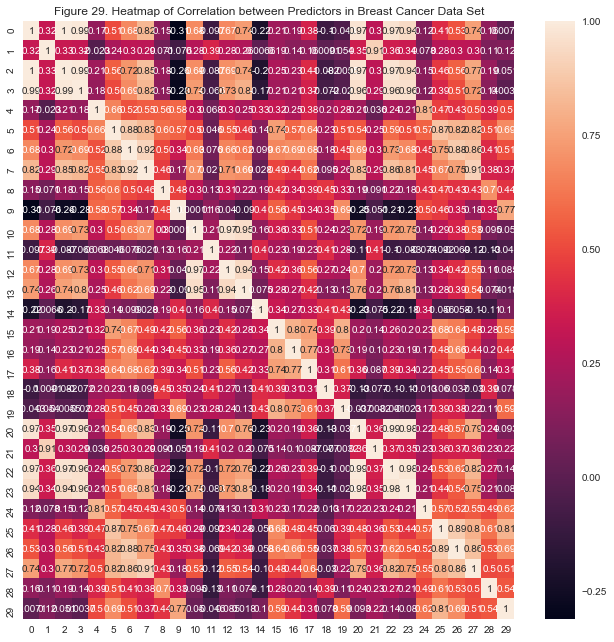

In [137]:
#Check correlation among predictor variables:
f, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(cancer_data.corr(), annot=True)
ax.set_title('Figure 29. Heatmap of Correlation between Predictors in Breast Cancer Data Set')
plt.show()


**Part 3c: Formulate Supervised Learning Question, and identify predictors, response variables and note if any cleaning or normalization is required**

The data are comprised of 10 main features, however additional engineered features have been provided (min, max of given original features), making the total feature set = 30. The main features include radius of nucleus, texture, perimeter, area, smoothness, concavity, symmetry, and fractal dimension. These are all properties of the nucleus when viewed in a 3-d setting. 

The data also include response variables of whether the cells are benign (i.e., normal cells/tissue) or malignant (i.e., cancerous). 

The data's response variable is the diagnosis for the given cell sample (y=0= "benign" and y=1="malignant"). The predictors are as described above. 

The data do not have any missing values as demonstrated below (Table 4, Figure 31). The response variables are distributed as shown in Figure 30. There are more "Malignant" diagnoses (n= 212) than "Benign" diagnoses (n=357). While these are not equal, there is not enough imbalance to invalidate our model, but this should be added to the context of our final model performance. 

Finally, as seen in Table 3, the minimum and maximum values of predictors vary fairly significantly. Thus, a pre-processing scaler was applied to the data to scale each predictor around a normalized mean of x = 0. 

Samples per class:
{'malignant': 212, 'benign': 357}

Figure 30. Distribution of Diagnositic Classes in n=569 samples


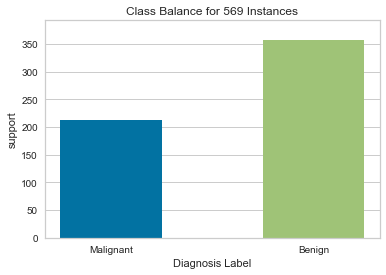

In [155]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

#Distribution/balance of each response variable class:
print("Samples per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

print('')
print('Figure 30. Distribution of Diagnositic Classes in n=569 samples')
# Specify the target
y = cancer_df_all[target]

visualizer = ClassBalance(labels=["Malignant","Benign"])
visualizer.fit(y)
visualizer.ax.set_xlabel("Diagnosis Label")
visualizer.poof()

In [138]:
print('Table 3. Summary Statistics of Breast Cancer Data Set')
cancer_df_all.describe()

Table 3. Summary Statistics of Breast Cancer Data Set


,diagnosis,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [197]:
#Given varying magnitude/ranges of predictor variables as seen in Table 3, it would be best to normalize our data:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

data = cancer_data

scaler = StandardScaler()
scaled_cancer_data = scaler.fit_transform(data)
scaled_cancer_data = np.array(scaled_cancer_data)

Table 4. Count of Missing Data in Target and Predictor Variables

diagnosis    0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
dtype: int64

There are no missing values in any variables.


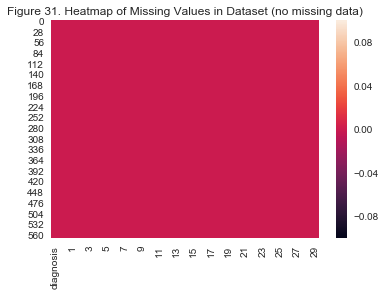

In [154]:
#Check for missing values:

print('Table 4. Count of Missing Data in Target and Predictor Variables')
print('')
print(cancer_df_all.isnull().sum())
print('')

#Check with null heatmap: 

missing = sns.heatmap(cancer_df_all.isnull())
missing.set(title = 'Figure 31. Heatmap of Missing Values in Dataset (no missing data)')

print('There are no missing values in any variables.')

**Part 3d: Which supervised learning technique will you use and why?**

I plan to use a k-Nearest Neighbor (k-NN) approach to modeling our data. I plan to use a k-NN because it is one of our supervised learning algorithms that can be implemented for classification problems, such as this one. More specifically, a k-NN could potentially have better model fit and performance on our data, because it is unclear whether our predictor variables have gaussian distributions, and thus a non-parametric approach can be attempted without these assumptions being made about the underlying data distribution. Also, given the relatively large value of p (30) relative to our value of n samples (569), there is a potential for our model to have non-linear separation boundaries, which could be better captured by a k-NN compared to a parametric, linear modeling approach (e.g., logistic regression). 

**Part 3e: How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?**

My first quality measurement will be to identify the optimal k-neighbor value using train and test data error rates. 

I will then assess model accuracy by assessing true positive rate (sensitivity) and false positive rate tradeoffs at different thresholds. Total model accuracy will be assessed on these relationships using an area under curve (AUC) of the receiver operator characteristic (ROC) curve. 

I will then proceed to use k-fold Cross Validation with a range of k-neighbor values in the k-NN model to increase classification accuracy. 

**Part 3f: Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.**

In [198]:
#3f: Divide data into training and testing:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(scaled_cancer_data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = [] 
test_accuracy = []


**3g: Run your analysis and show your performance; include plots of performance metrics:**

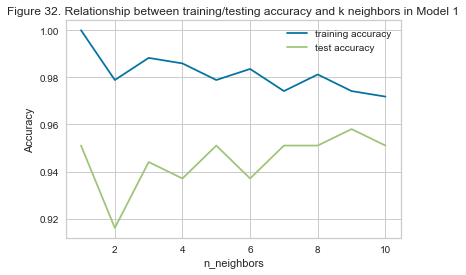

In [199]:
#Part 3g: run analyses and visualize model performance metrics 

#Identify k neighbors that optimize/minimize the test error:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))

#Plot Accuracy vs k-neighbor value
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Figure 32. Relationship between training/testing accuracy and k neighbors in Model 1")
plt.legend()

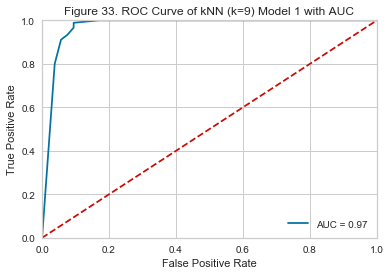

In [203]:
#Model 1: Train k-NN model with k=6

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Figure 33. ROC Curve of kNN (k=9) Model 1 with AUC')
plt.show()


In [204]:
#Cross-Validation Testing: Use Cross-Validation with k-NN to see if there is another optimal value of k-neighbors

from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
k_list = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k:
min_index = cv_scores.index(min(cv_scores))
optimal_k = k_list[min_index]
print("The optimal number of neighbors is {}.".format(optimal_k))

The optimal number of neighbors is 12.


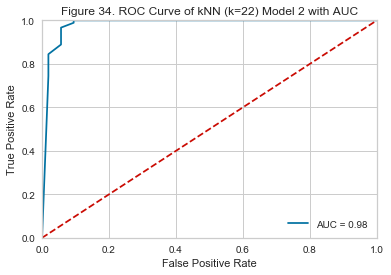

In [202]:
#Model 2: Train k-NN model with k=22 (optimized k-neighbor from )

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Figure 34. ROC Curve of kNN (k=12) Model 2 with AUC')
plt.show()

**Part 3h: Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.**

The first model (Model 1) used k-neighbors = 9 and performed with a classification AUC=0.97. The second model (Model 2) was developed after using a 10-fold cross-validation approach to optimizing k-neighbors to k=12. The classification performance of Model 2 had an AUC=0.98. 

Thus, both Models 1 and 2 performed with high true positive rates and simultaneous low false positive rates (i.e., both had AUC > 0.95). 

Further improvement in the model could be performed with using Principle Component Analysis (PCA) to generate component features that capture a larger proportion of cumulative variance of the higher dimension original features in lower dimensional features. Using feature reduction could allow for a more linear decision boundary (Figure 35), which could allow our data to be modeled and classified using the constructed principle features and with parametric, linear models such as logistic regression or linear discriminant analysis (LDA). 

Also, decision-tree based models could also potentially achieve higher classification accuracy than our k-NN models. Decision-trees, especially when used in a Random Forest paradigm, would have the potential value of implicitly performing feature selection or importance-ranking. Furthermore, the approach does not assume linearity of the data decision boundary, nor does the approach assume any gaussian distribution of the data. Thus, these approaches could help to increase model accuracy. 


Figure 35. Principle Component Analysis Decomposition 
of 30 Predictors for Cancer Diagnosis


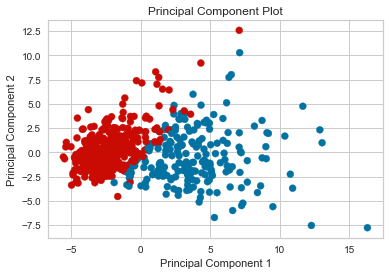

In [205]:
#Use PCA decomposition to see if there are principle components that could be used as features in another
#classification model:

from yellowbrick.features.pca import PCADecomposition

print('')
print('Figure 35. Principle Component Analysis Decomposition \nof 30 Predictors for Cancer Diagnosis')
# Specify the features of interest and the target

target = "diagnosis"
features = [col for col in cancer_df_all.columns if col != target]

# Extract the instance data and the target
X = cancer_df_all[features]
y = cancer_df_all[target]

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(X, y)
visualizer.poof()

**Part 3i: Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.**

Breast cancer is responsible for the highest mortality rate in women in the U.S., followed by lung and colorectal cancers. Early, correct diagnosis of this disease is important for early intervention and increased rates of survival. In many primary care settings, tissue biopsy is the gold-standard diagnostic technique for diagnosis, however diagnosis is fraught by human error. The developed model has value as a high accuracy diagnostic tool for detecting breast cancer from small tissue samples. The diagnostic tool has the potential for classifying malignant and benign cells in a fine-needle aspirant (FNA) sample of breast tissue. The model has the ability to detect breast cancer and avoid making "false alarm" diagnoses at very high rates. With the continued development of this diagnostic tool, better detection of breast cancer can occur at scale, in a timely manner, and with lower costs. 